In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/IMDB Dataset.csv")
df=df.iloc[:20000,]

df.shape

(20000, 2)

In [3]:
df["sentiment"].value_counts()
print(df["review"][0])
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

df.isnull().sum()
df.info()

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import re
from nltk.corpus import stopwords
def preprocessing_data(text):

    text =text.lower() #convert the text into the lower case

    tags = re.compile("<.*?>")
    text=re.sub(tags," ",text) #to remove htmls tags.

    #now remove urls
    urls = re.compile(r'https?://\S+|www\.\S+')
    text = re.sub(urls," ",text)

    #removing_stopwords
    new_text=[]
    for w in text.split():
        if w in stopwords.words("english"):
            new_text.append("")
        else:
            new_text.append(w)
    return " ".join(new_text)


In [6]:
df["review"]=df["review"].apply(preprocessing_data)


In [7]:
df.head()
df.shape

(19926, 2)

In [8]:
#now labelencoder to final_columns

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["sentiment"]=encoder.fit_transform(df["sentiment"])

df.head(4)
df.shape

(19926, 2)

In [9]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]
X.shape,y.shape

((19926, 1), (19926, 1))

In [10]:
#train test the data for modle
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15940, 1), (3986, 1), (15940, 1), (3986, 1))

# Bag of words

In [11]:
#now convert text into the bow:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)
X_train_bow=cv.fit_transform(X_train["review"]).toarray()
X_test_bow = cv.transform(X_test["review"]).toarray()

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_bow,y_train)

y_pred = model.predict(X_test_bow)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7824887104867034
[[1695  292]
 [ 575 1424]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1987
           1       0.83      0.71      0.77      1999

    accuracy                           0.78      3986
   macro avg       0.79      0.78      0.78      3986
weighted avg       0.79      0.78      0.78      3986



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

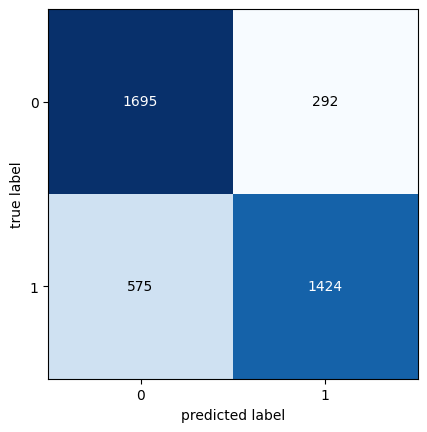

In [13]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)

# N-GRAM

In [14]:
#now convert text into the bow:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2),max_features=3000)
X_train_bow= cv.fit_transform(X_train["review"]).toarray()
X_test_bow = cv.transform(X_test["review"]).toarray()

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_bow,y_train)

y_pred = model.predict(X_test_bow)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7636728549924736
[[1308  679]
 [ 263 1736]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.74      1987
           1       0.72      0.87      0.79      1999

    accuracy                           0.76      3986
   macro avg       0.78      0.76      0.76      3986
weighted avg       0.78      0.76      0.76      3986



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

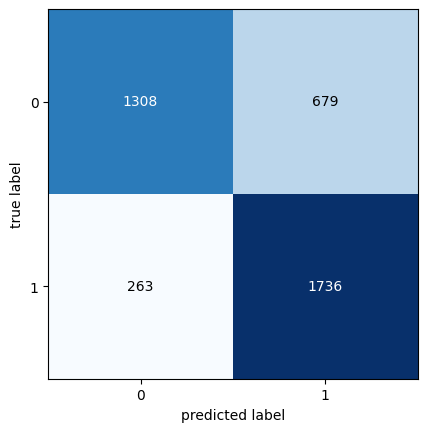

In [16]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)

# TF-IDF

In [17]:
#now convert text into the bow:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X_train_bow= cv.fit_transform(X_train["review"]).toarray()
X_test_bow = cv.transform(X_test["review"]).toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_bow,y_train)

y_pred = model.predict(X_test_bow)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


WORD2VEC

In [ ]:
model = Word2Vec(window=10,min_count=5)